In [2]:
import pandas as pd

In [3]:
# create a data frame for the Hou gene list
#hou = pd.read_csv("..\data\Hou_gene_list.csv")

# read in full marker file as Hou
hou = pd.read_csv("..\data\Hou_gene_list_full.csv")

# drop the empty columns
hou = hou.drop(columns=['Unnamed: 7', 'Unnamed: 8'])
hou.head(10)

,cluster,gene,p_val,avg_logFC,pct.1,pct.2,p_val_adj
0,Superficial Epithelial,si:ch211-207n23.2,0.0,3.783526,0.983,0.256,0.0
1,Superficial Epithelial,zgc:111983,0.0,3.634558,0.987,0.295,0.0
2,Superficial Epithelial,CABZ01088053.1,0.0,3.398964,0.935,0.188,0.0
3,Superficial Epithelial,krt1-19d,0.0,3.254499,0.877,0.123,0.0
4,Superficial Epithelial,si:dkey-247k7.2,0.0,3.182882,0.961,0.117,0.0
5,Superficial Epithelial,cldne,0.0,3.068289,0.982,0.149,0.0
6,Superficial Epithelial,gig2l,0.0,3.018676,0.514,0.165,0.0
7,Superficial Epithelial,si:ch211-157c3.4,0.0,2.870359,0.983,0.268,0.0
8,Superficial Epithelial,CABZ01072255.2,0.0,2.858588,0.876,0.105,0.0
9,Superficial Epithelial,si:ch211-217k17.10,0.0,2.838415,0.886,0.096,0.0


In [159]:
hartig_file = "..\data\Hartig_4dpa_ctrl_vs_treated.csv"
file = '4dpa_ctrl_vs_treated'
tablename = 'summary_' + file + '.png'
plotname = 'plot_' + file + '.png'

In [160]:
#create a data frame for the Hartig gene list
hartig = pd.read_csv(hartig_file)
hartig.head(10)

,GeneID,logFC,logCPM,PValue,FDR,DiffExp,Symbol,Description,GeneType,CTRL_0dpa_1,...,CTRL_2dpa_3,TREAT_2dpa_1,TREAT_2dpa_2,TREAT_2dpa_3,CTRL_4dpa_1,CTRL_4dpa_2,CTRL_4dpa_3,TREAT_4dpa_1,TREAT_4dpa_2,TREAT_4dpa_3
0,ENSDARG00000083639,5.467800,1.454001,3.050000e-05,0.007946,upregulated,U5,U5 spliceosomal RNA [Source:RFAM;Acc:RF00020],snRNA,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,3.807354922,#NAME?
1,ENSDARG00000081623,5.899558,1.582250,3.830000e-06,0.001460,upregulated,snoU6-53,Small nucleolar RNA U6-53/MBII-28 [Source:RFAM...,snoRNA,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,4.247927513
2,ENSDARG00000099127,4.157448,1.668629,1.110000e-05,0.003557,upregulated,CU041396.1,NaN,pseudogene,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,0,3,2,2.807354922
3,ENSDARG00000095870,5.564776,1.736248,3.080000e-05,0.007946,upregulated,si:ch1073-15f12.1,si:ch1073-15f12.1 [Source:ZFIN;Acc:ZDB-GENE-08...,processed_transcript,#NAME?,...,#NAME?,#NAME?,#NAME?,2.584962501,#NAME?,#NAME?,#NAME?,#NAME?,1,3.700439718
4,ENSDARG00000096280,5.656238,1.741186,1.550000e-05,0.004833,upregulated,ighz,immunoglobulin heavy constant zeta [Source:ZFI...,protein_coding,#NAME?,...,#NAME?,#NAME?,0,#NAME?,#NAME?,#NAME?,#NAME?,0,2.321928095,3.321928095
5,ENSDARG00000097677,5.250890,1.742610,2.459270e-04,0.042777,upregulated,igl4c1,immunoglobulin light 4 constant 1 [Source:ZFIN...,antisense,#NAME?,...,#NAME?,#NAME?,0,#NAME?,#NAME?,#NAME?,#NAME?,1,2.321928095,2.321928095
6,ENSDARG00000080918,6.399961,1.797335,1.970000e-09,0.000002,upregulated,5S_rRNA,5S ribosomal RNA [Source:RFAM;Acc:RF00001],rRNA,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,4.392317423,2.584962501,#NAME?
7,ENSDARG00000073763,5.250324,1.879427,2.479290e-04,0.042777,upregulated,CU896602.1,NaN,protein_coding,#NAME?,...,#NAME?,0,0,#NAME?,#NAME?,#NAME?,#NAME?,0,1,3.169925001
8,ENSDARG00000099629,5.363547,1.959947,1.252660e-04,0.024800,upregulated,5S_rRNA,5S ribosomal RNA [Source:RFAM;Acc:RF00001],rRNA,#NAME?,...,3.459431619,#NAME?,3.584962501,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,2.584962501,2.807354922
9,ENSDARG00000104132,5.363542,2.015733,1.261060e-04,0.024800,upregulated,si:dkey-161l11.37,si:dkey-161l11.37 [Source:ZFIN;Acc:ZDB-GENE-14...,TR_J_gene,2.584962501,...,#NAME?,0,0,1,#NAME?,#NAME?,#NAME?,2.807354922,1.584962501,1.584962501


In [161]:
# create a new data frame that contains only those rows that have matching values in both of the original data frames
# based on the 'gene' column in Hou and 'symbol' column in Hartig
merged_gene_list = pd.merge(left=hou, right=hartig, left_on='gene', right_on='Symbol')

# only include the listed columns: gene (Hou), symbol (Hartig), geneID, cluster, diffExp, avg_logFC (Hou), and logFC (Hartig)
merged_gene_list = merged_gene_list.loc[:, ['gene', 'Symbol', 'GeneID', 'cluster', 'DiffExp', 'avg_logFC', 'logFC']]
merged_gene_list.columns = ["gene_hou", "gene_hartig", "GeneID", "cluster", "DiffExp", "logFC_hou", "logFC_hartig"]
merged_gene_list

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
0,si:ch211-207n23.2,si:ch211-207n23.2,ENSDARG00000097157,Superficial Epithelial,none,3.783526,2.393375
1,zgc:111983,zgc:111983,ENSDARG00000006588,Superficial Epithelial,none,3.634558,0.987329
2,krt1-19d,krt1-19d,ENSDARG00000023082,Superficial Epithelial,none,3.254499,-1.915364
3,si:dkey-247k7.2,si:dkey-247k7.2,ENSDARG00000103199,Superficial Epithelial,none,3.182882,2.318256
4,cldne,cldne,ENSDARG00000043128,Superficial Epithelial,none,3.068289,0.974952
...,...,...,...,...,...,...,...
1044,lsm6,lsm6,ENSDARG00000036995,Mesenchymal,none,0.650483,0.457500
1045,cxcl12a,cxcl12a,ENSDARG00000037116,Mesenchymal,none,0.645527,0.134237
1046,cirbpb,cirbpb,ENSDARG00000013351,Mesenchymal,none,0.645116,-0.026357
1047,rbbp4,rbbp4,ENSDARG00000029058,Mesenchymal,none,0.644503,0.072816


In [162]:
# count how many genes of each type of DiffExp are present in the merged gene list
counts = merged_gene_list.groupby('DiffExp')['DiffExp'].count()
counts

DiffExp
none           1038
upregulated      11
Name: DiffExp, dtype: int64

In [163]:
# create a dataframe of the differentially downregulated genes that exist in both gene lists
downreg = merged_gene_list.loc[merged_gene_list['DiffExp'] == 'downregulated']
downreg

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig


In [164]:
# create a dataframe of the differentially upregulated that exist in both gene lists
upreg = merged_gene_list.loc[merged_gene_list['DiffExp'] == 'upregulated']
upreg

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
5,gig2l,gig2l,ENSDARG00000091730,Superficial Epithelial,upregulated,3.018676,5.018260
6,gig2l,gig2l,ENSDARG00000091730,Mucosal-like,upregulated,1.614395,5.018260
12,si:ch211-153b23.5,si:ch211-153b23.5,ENSDARG00000058206,Superficial Epithelial,upregulated,2.644409,3.334681
24,ogfrl2,ogfrl2,ENSDARG00000024815,Superficial Epithelial,upregulated,2.054369,3.229272
91,zgc:194101,zgc:194101,ENSDARG00000076828,Superficial Epithelial,upregulated,1.190950,2.786921
214,zgc:194655,zgc:194655,ENSDARG00000100942,Superficial Epithelial,upregulated,0.665518,2.291403
224,si:ch73-343g19.4,si:ch73-343g19.4,ENSDARG00000104398,Mucosal-like,upregulated,1.925771,3.221553
348,gig2h,gig2h,ENSDARG00000103444,Mucosal-like,upregulated,0.534017,3.286778
360,irf7,irf7,ENSDARG00000045661,Mucosal-like,upregulated,0.533854,3.713722
754,si:dkey-30j10.5,si:dkey-30j10.5,ENSDARG00000093186,Hematopoietic,upregulated,2.683245,2.732588


In [165]:
# get a list of all the cell types to then parse the gene list into separate cell cluster dataframes
merged_gene_list.cluster.unique()

array(['Superficial Epithelial', 'Mucosal-like',
       'Intermediate Epithelial', 'Hematopoietic', 'Basal Epithelial',
       'Mesenchymal'], dtype=object)

In [166]:
from statsmodels import robust

In [167]:
superficial = merged_gene_list[merged_gene_list['cluster'] == "Superficial Epithelial"]
superficial_MAD = robust.mad(superficial.logFC_hartig)
ser = pd.Series(superficial_MAD, index = ['MAD'])
superficial_stats = superficial.logFC_hartig.describe()
superficial_stats = superficial_stats.append(ser)
superficial_stats

count    181.000000
mean       0.248639
std        0.984019
min       -2.367784
25%       -0.305028
50%        0.181739
75%        0.660424
max        5.018260
MAD        0.721682
dtype: float64

In [168]:
mucosal = merged_gene_list[merged_gene_list['cluster'] == "Mucosal-like"]
mucosal_MAD = robust.mad(mucosal.logFC_hartig)
ser = pd.Series(mucosal_MAD, index = ['MAD'])
mucosal_stats = mucosal.logFC_hartig.describe()
mucosal_stats = mucosal_stats.append(ser)
mucosal_stats

count    169.000000
mean       0.424897
std        0.806226
min       -1.742236
25%       -0.015082
50%        0.327802
75%        0.732919
max        5.018260
MAD        0.561344
dtype: float64

In [169]:
intermediate = merged_gene_list[merged_gene_list['cluster'] == "Intermediate Epithelial"]
intermediate_MAD = robust.mad(intermediate.logFC_hartig)
ser = pd.Series(intermediate_MAD, index = ['MAD'])
intermediate_stats = intermediate.logFC_hartig.describe()
intermediate_stats = intermediate_stats.append(ser)
intermediate_stats

count    155.000000
mean      -0.198393
std        0.626295
min       -2.483930
25%       -0.488267
50%       -0.169333
75%        0.108479
max        1.982546
MAD        0.459954
dtype: float64

In [170]:
basal = merged_gene_list[merged_gene_list['cluster'] == "Basal Epithelial"]
basal_MAD = robust.mad(basal.logFC_hartig)
ser = pd.Series(basal_MAD, index = ['MAD'])
basal_stats = basal.logFC_hartig.describe()
basal_stats = basal_stats.append(ser)
basal_stats

count    188.000000
mean      -0.076906
std        0.327965
min       -1.146762
25%       -0.239701
50%       -0.063465
75%        0.160374
max        0.742608
MAD        0.313828
dtype: float64

In [171]:
hema = merged_gene_list[merged_gene_list['cluster'] == "Hematopoietic"]
hema_MAD = robust.mad(hema.logFC_hartig)
ser = pd.Series(hema_MAD, index = ['MAD'])
hema_stats = hema.logFC_hartig.describe()
hema_stats = hema_stats.append(ser)
hema_stats

count    173.000000
mean       0.441346
std        0.497549
min       -0.749852
25%        0.118774
50%        0.373447
75%        0.690788
max        2.732588
MAD        0.420938
dtype: float64

In [172]:
mesenchymal = merged_gene_list[merged_gene_list['cluster'] == "Mesenchymal"]
mesenchymal_MAD = robust.mad(mesenchymal.logFC_hartig)
ser = pd.Series(mesenchymal_MAD, index = ['MAD'])
mesenchymal_stats = mesenchymal.logFC_hartig.describe()
mesenchymal_stats = mesenchymal_stats.append(ser)
mesenchymal_stats

count    183.000000
mean       0.153711
std        0.272405
min       -0.944532
25%       -0.010904
50%        0.159110
75%        0.336525
max        1.275030
MAD        0.258190
dtype: float64

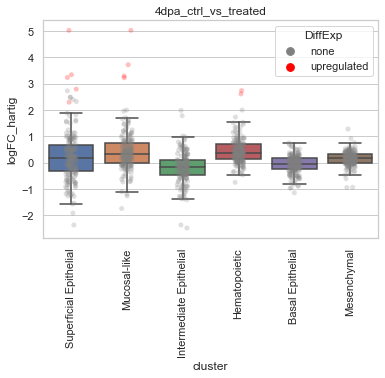

In [179]:
# box plot their distributions

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="cluster", y="logFC_hartig", data=merged_gene_list, showfliers = False).set_title(file)
ax = sns.stripplot(x="cluster", y="logFC_hartig", hue="DiffExp", palette=["grey","red","blue"], data=merged_gene_list, color="0.5", alpha=0.25)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.savefig("boxplot/"+plotname, bbox_inches='tight')
plt.show()

In [174]:
summary = pd.DataFrame(superficial_stats)
summary.columns = ["superficial"]
summary['intermediate'] = intermediate_stats
summary['basal'] = basal_stats
summary['mucosal-like'] = mucosal_stats
summary['mesenchymal'] = mesenchymal_stats
summary['hematopoietic'] = hema_stats

In [175]:
summary

,superficial,intermediate,basal,mucosal-like,mesenchymal,hematopoietic
count,181.000000,155.000000,188.000000,169.000000,183.000000,173.000000
mean,0.248639,-0.198393,-0.076906,0.424897,0.153711,0.441346
std,0.984019,0.626295,0.327965,0.806226,0.272405,0.497549
min,-2.367784,-2.483930,-1.146762,-1.742236,-0.944532,-0.749852
25%,-0.305028,-0.488267,-0.239701,-0.015082,-0.010904,0.118774
50%,0.181739,-0.169333,-0.063465,0.327802,0.159110,0.373447
75%,0.660424,0.108479,0.160374,0.732919,0.336525,0.690788
max,5.018260,1.982546,0.742608,5.018260,1.275030,2.732588
MAD,0.721682,0.459954,0.313828,0.561344,0.258190,0.420938


In [176]:
import dataframe_image as dfi
df_styled = summary.style.background_gradient()
df_styled = summary.style.set_caption(file)
dfi.export(df_styled, "summary_tables/"+tablename)

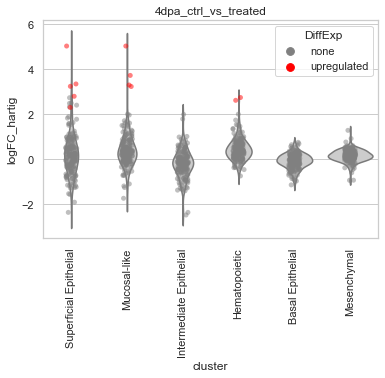

In [180]:
# violin plot with all expression levels labeled
sns.set(style="whitegrid")

ax1 = sns.violinplot(x="cluster", y="logFC_hartig", inner=None, color=".8", data=merged_gene_list).set_title(file)

ax1 = sns.stripplot(x="cluster", y="logFC_hartig", hue="DiffExp", palette=["grey","red","blue"], data=merged_gene_list, alpha=0.5)

v_plotname = "violin_" + plotname
plt.xticks(rotation=90)
plt.savefig("violin_plot/"+v_plotname, bbox_inches='tight')
plt.show()

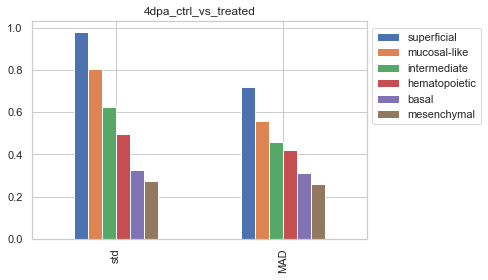

In [178]:
# plot SDs and MAD values

#need to use index values as y-axis label and headers a x-axis labels
table = summary.loc[['std','MAD'],:]
ax = table[['superficial','mucosal-like','intermediate','hematopoietic','basal','mesenchymal']].plot(kind='bar', title=file)
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("std_mad_barplot/std_mad_" +plotname, bbox_inches='tight')
plt.show()